# Modelagem FutIA

Código escrito no jupyter

# Bibliotecas Utilizada:

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

from pycaret.classification import *

# Carregando base de dados:


In [2]:
df_dataset = pd.read_parquet('dataset_9.parquet')
df_dataset.head()

,Ano,Rodada,id,fgk_equipe,Oponente,TR0,TR1,TR2,TR3,TR4,...,OP4,OC0,OC1,OC2,OC3,OC4,OGL,Resultado,GP,GC
0,2014-2015,6,9d2c4411,17892952,b2b47a98,1,0,2,1,0,...,0,2,4,3,0,2,1,2,1,0
1,2014-2015,7,bc4351a4,17892952,8ef52968,2,1,0,2,1,...,1,0,0,2,1,1,0,0,1,3
2,2014-2015,8,6fa0779f,17892952,fb10988f,0,2,1,0,2,...,3,2,0,1,4,0,1,2,2,1
3,2014-2015,9,2be4379e,17892952,33c895d4,2,0,2,1,0,...,4,0,1,1,0,0,0,0,0,1
4,2014-2015,10,c172f461,17892952,7c21e445,0,2,0,2,1,...,3,1,1,0,2,1,1,1,2,2


In [3]:
df_dataset.columns

Index(['Ano', 'Rodada', 'id', 'fgk_equipe', 'Oponente', 'TR0', 'TR1', 'TR2',
       'TR3', 'TR4', 'TL0', 'TL1', 'TL2', 'TL3', 'TL4', 'TP0', 'TP1', 'TP2',
       'TP3', 'TP4', 'TC0', 'TC1', 'TC2', 'TC3', 'TC4', 'TGL', 'OR0', 'OR1',
       'OR2', 'OR3', 'OR4', 'OL0', 'OL1', 'OL2', 'OL3', 'OL4', 'OP0', 'OP1',
       'OP2', 'OP3', 'OP4', 'OC0', 'OC1', 'OC2', 'OC3', 'OC4', 'OGL',
       'Resultado', 'GP', 'GC'],
      dtype='object')

# Tratamento de dados

## Criação das médias móveis:

In [4]:
df_train = df_dataset[['Ano', 'Rodada', 'id', 'fgk_equipe', 'Oponente', 'Resultado', 'GP', 'GC', 'TGL', 'OGL']]

In [5]:
df_train['TR_mean'] = df_dataset[['TR0', 'TR1', 'TR2', 'TR3', 'TR4']].mean(axis=1)
df_train['TL_mean'] = df_dataset[['TL0', 'TL1', 'TL2', 'TL3', 'TL4']].mean(axis=1)
df_train['TP_mean'] = df_dataset[['TP0', 'TP1', 'TP2', 'TP3', 'TP4']].mean(axis=1)
df_train['TC_mean'] = df_dataset[['TC0', 'TC1', 'TC2', 'TC3', 'TC4']].mean(axis=1)
df_train['OR_mean'] = df_dataset[['OR0', 'OR1', 'OR2', 'OR3', 'OR4']].mean(axis=1)
df_train['OL_mean'] = df_dataset[['OL0', 'OL1', 'OL2', 'OL3', 'OL4']].mean(axis=1)
df_train['OP_mean'] = df_dataset[['OP0', 'OP1', 'OP2', 'OP3', 'OP4']].mean(axis=1)
df_train['OC_mean'] = df_dataset[['OC0', 'OC1', 'OC2', 'OC3', 'OC4']].mean(axis=1)

In [6]:
df_train.head()

,Ano,Rodada,id,fgk_equipe,Oponente,Resultado,GP,GC,TGL,OGL,TR_mean,TL_mean,TP_mean,TC_mean,OR_mean,OL_mean,OP_mean,OC_mean
0,2014-2015,6,9d2c4411,17892952,b2b47a98,2,1,0,1,1,0.8,0.4,0.8,1.0,0.6,0.6,1.0,2.2
1,2014-2015,7,bc4351a4,17892952,8ef52968,0,1,3,0,0,1.2,0.4,1.0,0.8,0.8,0.6,0.6,0.8
2,2014-2015,8,6fa0779f,17892952,fb10988f,2,2,1,1,1,1.0,0.4,1.0,1.2,0.8,0.6,1.4,1.4
3,2014-2015,9,2be4379e,17892952,33c895d4,0,0,1,0,0,1.0,0.6,1.2,1.4,1.6,0.6,3.0,0.4
4,2014-2015,10,c172f461,17892952,7c21e445,1,2,2,1,1,1.0,0.4,1.2,1.4,1.6,0.6,2.2,1.0


## Criando coluna de resultado como empate e não empate:

Primeiro vou alterar a coluna resultados:

Antes: </br>
0 - Derrota </br>
1 - Empate </br>
2 - Vitória 

Depois: </br>
0 - Empate </br>
1 - Derrota </br>
2 - Vitória 

In [7]:
df_train['Resultado'].replace(to_replace=0, value=3, inplace=True)
df_train['Resultado'].replace(to_replace=1, value=0, inplace=True)
df_train['Resultado'].replace(to_replace=3, value=1, inplace=True)

Aqui vamos deixar: </br>
0 - Empate </br>
1 - Não Empate

In [8]:
df_train['Resultado'].value_counts()

2    2091
1    2091
0    1264
Name: Resultado, dtype: int64

In [9]:
df_train['Resultado_Empate'] = df_train['Resultado']
df_train['Resultado_Empate'].replace(to_replace=2, value=1, inplace=True)

In [10]:
df_train['Resultado_Empate'].value_counts()

1    4182
0    1264
Name: Resultado_Empate, dtype: int64

In [11]:
df_train.columns

Index(['Ano', 'Rodada', 'id', 'fgk_equipe', 'Oponente', 'Resultado', 'GP',
       'GC', 'TGL', 'OGL', 'TR_mean', 'TL_mean', 'TP_mean', 'TC_mean',
       'OR_mean', 'OL_mean', 'OP_mean', 'OC_mean', 'Resultado_Empate'],
      dtype='object')

In [12]:
df_test_ve =  df_train[['TR_mean', 'TL_mean', 'TP_mean',
                         'TC_mean', 'OR_mean', 'OL_mean',
                         'OP_mean', 'OC_mean']]

In [13]:
df_test_vd = df_train[['TR_mean', 'TL_mean', 'TP_mean',
                         'TC_mean', 'OR_mean', 'OL_mean',
                         'OP_mean', 'OC_mean']]

## Normalizando os dados das bases de teste:

In [14]:
df_test_ve=(df_test_ve-df_test_ve.min())/(df_test_ve.max()-df_test_ve.min())

In [15]:
df_test_vd=(df_test_vd-df_test_vd.min())/(df_test_vd.max()-df_test_vd.min())

# Hipótese 1: Usar todos os dados ou apenas dados do time da casa?

## Utilizando todos os dados:

In [16]:
df_train_cut1 = df_train[['TR_mean', 'TL_mean', 'TP_mean',
                         'TC_mean', 'OR_mean', 'OL_mean',
                         'OP_mean', 'OC_mean']]

In [17]:
# Normalizando

df_train_cut1=(df_train_cut1-df_train_cut1.min())/(df_train_cut1.max()-df_train_cut1.min())

In [18]:
# Acrescentando variável resposta 

df_train_cut1['Resultado'] = df_train['Resultado']

In [19]:
df_train_cut1.head()

,TR_mean,TL_mean,TP_mean,TC_mean,OR_mean,OL_mean,OP_mean,OC_mean,Resultado
0,0.4,0.333333,0.166667,0.217391,0.3,0.666667,0.208333,0.478261,2
1,0.6,0.333333,0.208333,0.173913,0.4,0.666667,0.125000,0.173913,1
2,0.5,0.333333,0.208333,0.260870,0.4,0.666667,0.291667,0.304348,2
3,0.5,0.666667,0.250000,0.304348,0.8,0.666667,0.625000,0.086957,1
4,0.5,0.333333,0.250000,0.304348,0.8,0.666667,0.458333,0.217391,0


In [20]:
# Preparando o modelo

exp_clf1 = setup(data = df_train_cut1, target = 'Resultado')

,Description,Value
0,Session id,3135
1,Target,Resultado
2,Target type,Multiclass
3,Original data shape,"(5446, 9)"
4,Transformed data shape,"(5446, 9)"
5,Transformed train set shape,"(3812, 9)"
6,Transformed test set shape,"(1634, 9)"
7,Numeric features,8
8,Preprocess,True
9,Imputation type,simple


In [21]:
%%time

best_model1 = compare_models(fold=10, sort = 'Prec.')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ada,Ada Boost Classifier,0.4803,0.6055,0.4803,0.4573,0.4212,0.1580,0.1699,0.3990
gbc,Gradient Boosting Classifier,0.4866,0.6178,0.4866,0.4477,0.4319,0.1702,0.1820,1.7070
qda,Quadratic Discriminant Analysis,0.4709,0.6156,0.4709,0.4357,0.4141,0.1431,0.1537,0.0630
lightgbm,Light Gradient Boosting Machine,0.4496,0.5963,0.4496,0.4230,0.4250,0.1266,0.1299,0.3760
rf,Random Forest Classifier,0.4376,0.5826,0.4376,0.4058,0.4137,0.1099,0.1124,0.6010
knn,K Neighbors Classifier,0.3951,0.5544,0.3951,0.4046,0.3961,0.0783,0.0790,0.1140
et,Extra Trees Classifier,0.4195,0.5710,0.4195,0.3961,0.4026,0.0866,0.0879,0.5950
xgboost,Extreme Gradient Boosting,0.4161,0.5811,0.4161,0.3929,0.3988,0.0807,0.0820,0.9390
dt,Decision Tree Classifier,0.3843,0.5295,0.3843,0.3865,0.3847,0.0568,0.0569,0.0940
svm,SVM - Linear Kernel,0.4832,0.0000,0.4832,0.3830,0.4190,0.1628,0.1800,0.1090


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

CPU times: user 45 s, sys: 669 ms, total: 45.7 s
Wall time: 60 s


In [22]:
best_model1

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=3135)

In [23]:
%%time

tuned_model1 = tune_model(best_model1, fold=10, n_iter=100, optimize = 'Prec.')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.4607,0.5755,0.4607,0.4029,0.4058,0.1281,0.1370
1,0.5183,0.6213,0.5183,0.3997,0.4513,0.2197,0.2364
2,0.4961,0.6231,0.4961,0.3812,0.4310,0.1835,0.1980
3,0.4882,0.6217,0.4882,0.3753,0.4242,0.1707,0.1843
4,0.4908,0.6114,0.4908,0.3780,0.4267,0.1750,0.1891
5,0.4672,0.6006,0.4672,0.3598,0.4065,0.1344,0.1450
6,0.4961,0.6250,0.4961,0.3830,0.4321,0.1817,0.1958
7,0.4672,0.5916,0.4672,0.3611,0.4053,0.1352,0.1468
8,0.5066,0.6432,0.5066,0.6192,0.4433,0.1987,0.2144


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits
CPU times: user 1min, sys: 105 ms, total: 1min
Wall time: 1min 13s


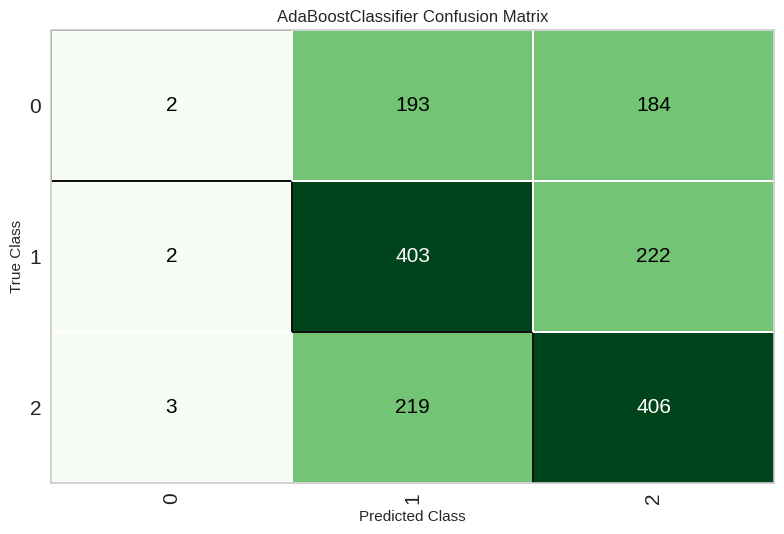

In [24]:
plot_model(tuned_model1, plot = 'confusion_matrix')

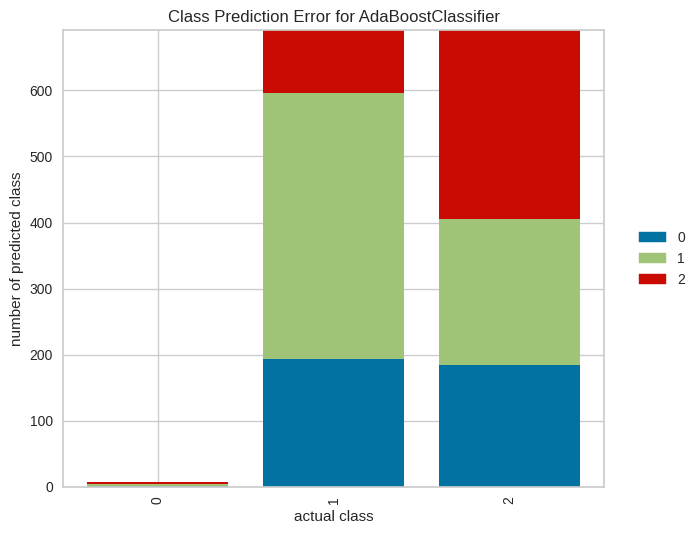

In [25]:
plot_model(tuned_model1, plot = 'error')

## Utilizando apenas dados de jogos em casa para evitar o espelhamento de dados:

In [26]:
df_train_short = df_train.drop(df_train[df_train['TGL']==0].index, axis=0)
df_train_short.head()

,Ano,Rodada,id,fgk_equipe,Oponente,Resultado,GP,GC,TGL,OGL,TR_mean,TL_mean,TP_mean,TC_mean,OR_mean,OL_mean,OP_mean,OC_mean,Resultado_Empate
0,2014-2015,6,9d2c4411,17892952,b2b47a98,2,1,0,1,1,0.8,0.4,0.8,1.0,0.6,0.6,1.0,2.2,1
2,2014-2015,8,6fa0779f,17892952,fb10988f,2,2,1,1,1,1.0,0.4,1.0,1.2,0.8,0.6,1.4,1.4,1
4,2014-2015,10,c172f461,17892952,7c21e445,0,2,2,1,1,1.0,0.4,1.2,1.4,1.6,0.6,2.2,1.0,0
6,2014-2015,12,f618534b,17892952,943e8050,1,1,2,1,1,1.0,0.4,1.4,1.6,0.6,0.6,1.0,2.2,1
9,2014-2015,15,625f358a,17892952,18bb7c10,2,3,2,1,1,0.6,0.4,1.2,1.6,1.2,0.6,1.4,0.8,1


In [27]:
df_train_short['Resultado_Empate'].value_counts()

1    2091
0     632
Name: Resultado_Empate, dtype: int64

## Selecionando as variáveis que desejamos:

In [28]:
df_train_cut = df_train_short[['TR_mean', 'TL_mean', 'TP_mean',
                               'TC_mean', 'OR_mean', 'OL_mean',
                               'OP_mean', 'OC_mean']]

In [29]:
# Normalizando

df_train_cut=(df_train_cut-df_train_cut.min())/(df_train_cut.max()-df_train_cut.min())

In [30]:
# Acrescentando variável resposta 

df_train_cut['Resultado'] = df_train_short['Resultado']

In [31]:
df_train_cut.head()

,TR_mean,TL_mean,TP_mean,TC_mean,OR_mean,OL_mean,OP_mean,OC_mean,Resultado
0,0.4,0.5,0.166667,0.217391,0.3,0.666667,0.227273,0.523810,2
2,0.5,0.5,0.208333,0.260870,0.4,0.666667,0.318182,0.333333,2
4,0.5,0.5,0.250000,0.304348,0.8,0.666667,0.500000,0.238095,0
6,0.5,0.5,0.291667,0.347826,0.3,0.666667,0.227273,0.523810,1
9,0.3,0.5,0.250000,0.347826,0.6,0.666667,0.318182,0.190476,2


## Escolha do modelo:

In [32]:
exp_clf2 = setup(data = df_train_cut, target = 'Resultado')

,Description,Value
0,Session id,976
1,Target,Resultado
2,Target type,Multiclass
3,Original data shape,"(2723, 9)"
4,Transformed data shape,"(2723, 9)"
5,Transformed train set shape,"(1906, 9)"
6,Transformed test set shape,"(817, 9)"
7,Numeric features,8
8,Preprocess,True
9,Imputation type,simple


In [33]:
%%time

best_model2 = compare_models(fold=10, sort = 'Prec.')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ada,Ada Boost Classifier,0.4926,0.5869,0.4926,0.4459,0.4256,0.1363,0.1552,0.2490
gbc,Gradient Boosting Classifier,0.4858,0.5963,0.4858,0.4374,0.4248,0.1262,0.1433,0.8890
et,Extra Trees Classifier,0.4570,0.5846,0.4570,0.4319,0.4343,0.1163,0.1198,0.3870
rf,Random Forest Classifier,0.4607,0.5870,0.4607,0.4286,0.4314,0.1162,0.1212,0.5060
lightgbm,Light Gradient Boosting Machine,0.4465,0.5738,0.4465,0.4231,0.4280,0.1057,0.1082,0.2900
xgboost,Extreme Gradient Boosting,0.4365,0.5683,0.4365,0.4141,0.4193,0.0910,0.0928,0.4890
qda,Quadratic Discriminant Analysis,0.4811,0.5933,0.4811,0.4104,0.4167,0.1233,0.1374,0.0550
svm,SVM - Linear Kernel,0.4764,0.0000,0.4764,0.4034,0.4141,0.1319,0.1528,0.0860
knn,K Neighbors Classifier,0.3908,0.5533,0.3908,0.4016,0.3938,0.0645,0.0648,0.1120
dt,Decision Tree Classifier,0.3951,0.5316,0.3951,0.3975,0.3950,0.0603,0.0605,0.0810


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

CPU times: user 33.4 s, sys: 483 ms, total: 33.9 s
Wall time: 41.6 s


In [34]:
best_model2

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=976)

In [35]:
%%time

tuned_model2 = tune_model(best_model2, fold=10, n_iter=100, optimize = 'Prec.')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5393,0.6264,0.5393,0.4279,0.4463,0.1923,0.2504
1,0.5183,0.5908,0.5183,0.4224,0.4169,0.1456,0.2114
2,0.4974,0.6397,0.4974,0.3785,0.3876,0.1073,0.1582
3,0.4660,0.5639,0.4660,0.3463,0.3880,0.0805,0.0945
4,0.4817,0.5820,0.4817,0.3835,0.3877,0.0830,0.1171
5,0.5288,0.6212,0.5288,0.4221,0.4388,0.1739,0.2265
6,0.5000,0.6110,0.5000,0.3817,0.4115,0.1311,0.1649
7,0.4579,0.5736,0.4579,0.3353,0.3701,0.0597,0.0752
8,0.4579,0.5593,0.4579,0.3272,0.3607,0.0536,0.0706


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits
CPU times: user 43.2 s, sys: 116 ms, total: 43.3 s
Wall time: 46.5 s


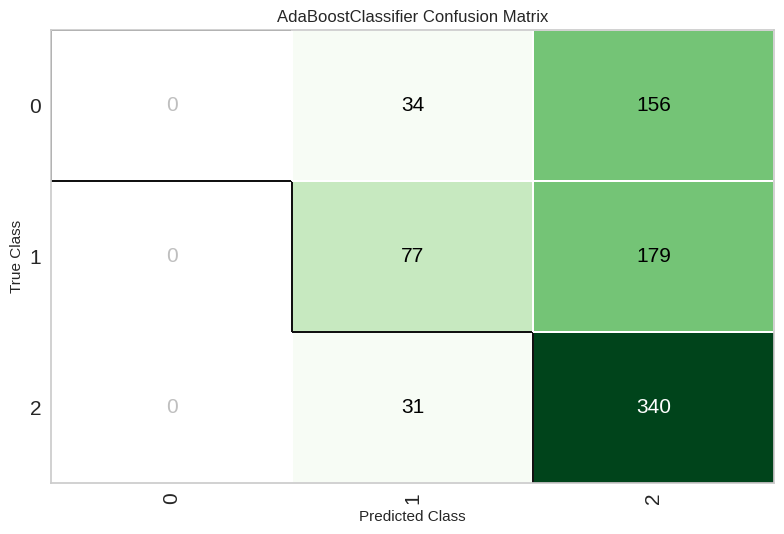

In [36]:
plot_model(tuned_model2, plot = 'confusion_matrix')

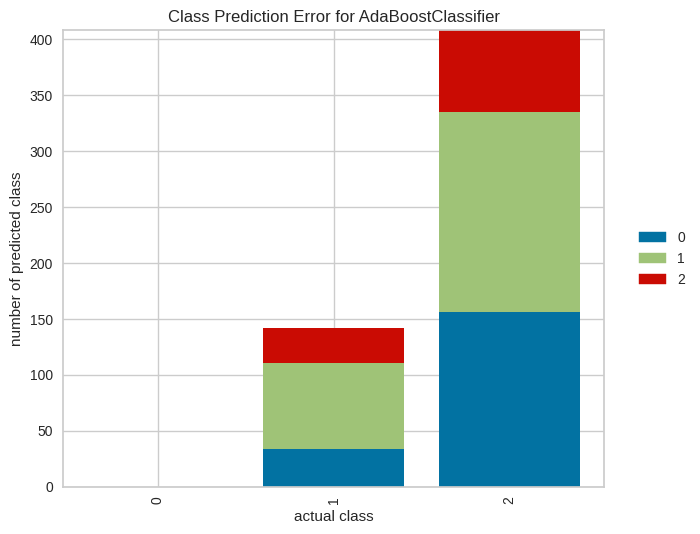

In [37]:
plot_model(tuned_model2, plot = 'error')

# Conclusão Hipótese 1:

Apesar de mínima diferença utilizar a base de dados não espelhada foi melhor, continuaremos com ela.

# Hipótese 2: Criar dois modelos para previsão de vitória, derrota ou empate:

## Modelo Empate ou Não Empate:

In [38]:
df_train_cut['Resultado_Empate'] = df_train_short['Resultado_Empate']
df_train_cut.drop(columns='Resultado', inplace=True)

In [39]:
df_train_cut.head()

,TR_mean,TL_mean,TP_mean,TC_mean,OR_mean,OL_mean,OP_mean,OC_mean,Resultado_Empate
0,0.4,0.5,0.166667,0.217391,0.3,0.666667,0.227273,0.523810,1
2,0.5,0.5,0.208333,0.260870,0.4,0.666667,0.318182,0.333333,1
4,0.5,0.5,0.250000,0.304348,0.8,0.666667,0.500000,0.238095,0
6,0.5,0.5,0.291667,0.347826,0.3,0.666667,0.227273,0.523810,1
9,0.3,0.5,0.250000,0.347826,0.6,0.666667,0.318182,0.190476,1


In [40]:
exp_clf3 = setup(data = df_train_cut, target = 'Resultado_Empate')

,Description,Value
0,Session id,668
1,Target,Resultado_Empate
2,Target type,Binary
3,Original data shape,"(2723, 9)"
4,Transformed data shape,"(2723, 9)"
5,Transformed train set shape,"(1906, 9)"
6,Transformed test set shape,"(817, 9)"
7,Numeric features,8
8,Preprocess,True
9,Imputation type,simple


In [41]:
%%time

best_model3 = compare_models(fold=10, sort = 'Prec.')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dt,Decision Tree Classifier,0.6506,0.5230,0.7610,0.7787,0.7695,0.0461,0.0461,0.0590
xgboost,Extreme Gradient Boosting,0.7298,0.5421,0.9140,0.7749,0.8386,0.0423,0.0475,0.1900
knn,K Neighbors Classifier,0.7308,0.5252,0.9160,0.7747,0.8393,0.0422,0.0499,0.0780
rf,Random Forest Classifier,0.7592,0.5450,0.9706,0.7736,0.8609,0.0418,0.0663,0.3990
et,Extra Trees Classifier,0.7455,0.5452,0.9460,0.7733,0.8510,0.0368,0.0479,0.3600
lightgbm,Light Gradient Boosting Machine,0.7430,0.5357,0.9440,0.7721,0.8494,0.0281,0.0357,0.1390
qda,Quadratic Discriminant Analysis,0.7670,0.5151,0.9959,0.7690,0.8679,0.0075,0.0309,0.0510
nb,Naive Bayes,0.7681,0.5178,0.9993,0.7684,0.8688,0.0024,0.0093,0.0530
lr,Logistic Regression,0.7681,0.5139,1.0000,0.7681,0.8688,0.0000,0.0000,0.1770
svm,SVM - Linear Kernel,0.7681,0.0000,1.0000,0.7681,0.8688,0.0000,0.0000,0.0620


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

CPU times: user 21.8 s, sys: 262 ms, total: 22.1 s
Wall time: 26.6 s


In [42]:
best_model3

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       random_state=668, splitter='best')

In [51]:
%%time

tuned_model3 = tune_model(best_model3, fold=10, n_iter=100, optimize = 'Prec.')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6354,0.4877,0.7297,0.7826,0.7552,0.0444,0.0448
1,0.6875,0.4837,0.8784,0.7558,0.8125,-0.0942,-0.1048
2,0.7500,0.4635,0.9459,0.7778,0.8537,0.0495,0.0640
3,0.6771,0.5071,0.8514,0.7590,0.8025,-0.0674,-0.0709
4,0.6562,0.5843,0.7808,0.7703,0.7755,0.0423,0.0423
5,0.7292,0.5753,0.9315,0.7640,0.8395,0.0242,0.0303
6,0.7158,0.6619,0.8630,0.7875,0.8235,0.1016,0.1044
7,0.6632,0.5022,0.7945,0.7733,0.7838,0.0225,0.0226
8,0.6842,0.5974,0.8082,0.7867,0.7973,0.0836,0.0838


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 20 folds for each of 50 candidates, totalling 1000 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).
CPU times: user 32.6 s, sys: 343 ms, total: 33 s
Wall time: 38.9 s


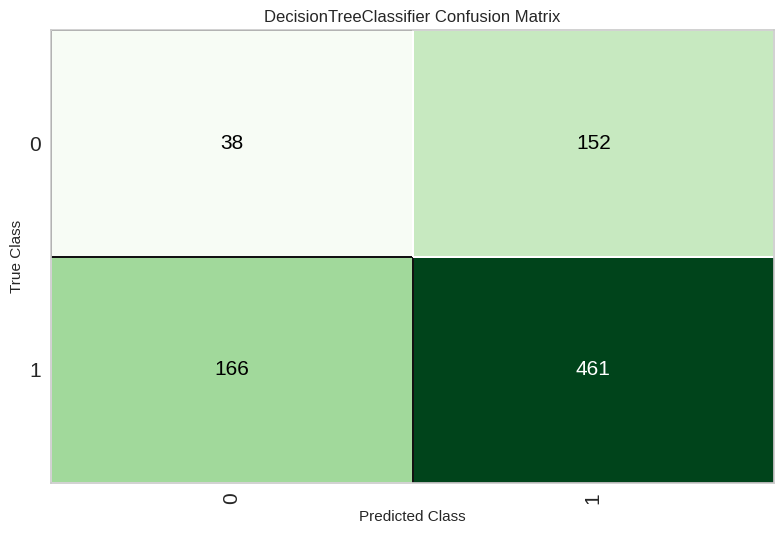

In [52]:
plot_model(tuned_model3, plot = 'confusion_matrix')

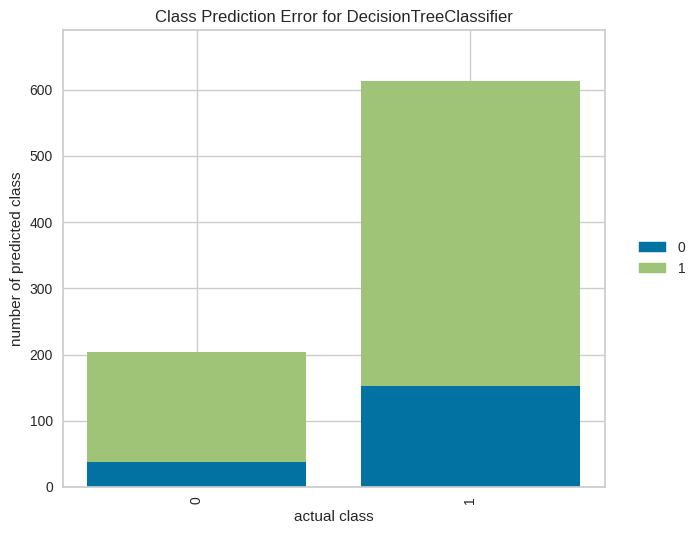

In [47]:
plot_model(tuned_model3, plot = 'error')

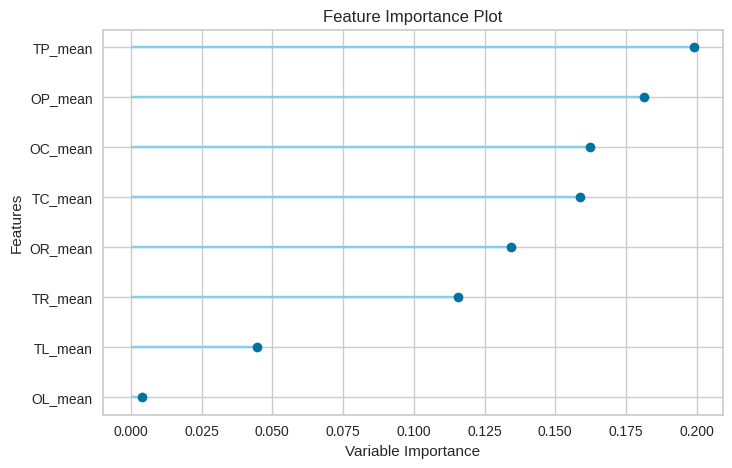

In [48]:
plot_model(tuned_model3, plot = 'feature')

# Modelo Vitória ou Derrota

Removendo os dados de empate do Dataframe:

In [53]:
df_train_v_d = df_train_short.drop(df_train_short[df_train_short['Resultado']==0].index)

In [54]:
df_train_v_d['Resultado'].value_counts()

2    1238
1     853
Name: Resultado, dtype: int64

Criando coluna que informa vitória (1) e derrota (0):

In [55]:
df_train_v_d['Resultado_Vitoria'] = df_train_v_d['Resultado']-1

In [56]:
df_train_v_d['Resultado_Vitoria'].value_counts()

1    1238
0     853
Name: Resultado_Vitoria, dtype: int64

In [57]:
df_train_v_d.columns

Index(['Ano', 'Rodada', 'id', 'fgk_equipe', 'Oponente', 'Resultado', 'GP',
       'GC', 'TGL', 'OGL', 'TR_mean', 'TL_mean', 'TP_mean', 'TC_mean',
       'OR_mean', 'OL_mean', 'OP_mean', 'OC_mean', 'Resultado_Empate',
       'Resultado_Vitoria'],
      dtype='object')

In [58]:
df_train_v_d_cut = df_train_v_d[['TR_mean', 'TL_mean', 'TP_mean',
                                 'TC_mean', 'OR_mean', 'OL_mean',
                                 'OP_mean', 'OC_mean', 'Resultado_Vitoria']]

In [59]:
exp_clf4 = setup(data = df_train_v_d_cut, target = 'Resultado_Vitoria') 

,Description,Value
0,Session id,7615
1,Target,Resultado_Vitoria
2,Target type,Binary
3,Original data shape,"(2091, 9)"
4,Transformed data shape,"(2091, 9)"
5,Transformed train set shape,"(1463, 9)"
6,Transformed test set shape,"(628, 9)"
7,Numeric features,8
8,Preprocess,True
9,Imputation type,simple


In [60]:
%%time

best_model4 = compare_models(fold=10, sort = 'Prec.')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
nb,Naive Bayes,0.6562,0.6954,0.7369,0.7001,0.7168,0.2794,0.2817,0.1290
svm,SVM - Linear Kernel,0.6126,0.0000,0.6852,0.6934,0.6305,0.1971,0.2359,0.0880
et,Extra Trees Classifier,0.6521,0.6689,0.7598,0.6863,0.7209,0.2621,0.2650,0.3420
rf,Random Forest Classifier,0.6535,0.6735,0.7679,0.6851,0.7238,0.2625,0.2662,0.4540
lr,Logistic Regression,0.6699,0.6986,0.8235,0.6848,0.7469,0.2832,0.2952,0.1700
ridge,Ridge Classifier,0.6685,0.0000,0.8258,0.6826,0.7467,0.2791,0.2915,0.0710
lda,Linear Discriminant Analysis,0.6665,0.6980,0.8223,0.6817,0.7447,0.2753,0.2873,0.0640
gbc,Gradient Boosting Classifier,0.6569,0.6759,0.8222,0.6722,0.7393,0.2517,0.2635,0.3690
lightgbm,Light Gradient Boosting Machine,0.6281,0.6503,0.7344,0.6694,0.7002,0.2132,0.2152,0.1770
qda,Quadratic Discriminant Analysis,0.6357,0.6748,0.7761,0.6653,0.7157,0.2161,0.2224,0.0550


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

CPU times: user 21.1 s, sys: 244 ms, total: 21.3 s
Wall time: 32.5 s


In [61]:
best_model4

GaussianNB(priors=None, var_smoothing=1e-09)

In [62]:
%%time

tuned_model4 = tune_model(best_model4, fold=10, n_iter=100, optimize = 'Prec.')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6395,0.6374,0.6667,0.7073,0.6864,0.2633,0.2639
1,0.6463,0.6533,0.7241,0.6923,0.7079,0.2602,0.2606
2,0.6190,0.6678,0.6667,0.6824,0.6744,0.2156,0.2156
3,0.6918,0.7560,0.7093,0.7531,0.7305,0.3713,0.3722
4,0.6781,0.6961,0.7442,0.7191,0.7314,0.3300,0.3303
5,0.6918,0.7397,0.8256,0.7030,0.7594,0.3384,0.3469
6,0.6438,0.7074,0.8023,0.6635,0.7263,0.2294,0.2380
7,0.6781,0.7050,0.7701,0.7128,0.7403,0.3186,0.3202
8,0.6301,0.7033,0.7241,0.6774,0.7000,0.2193,0.2201


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 28 candidates, totalling 280 fits
CPU times: user 9.67 s, sys: 121 ms, total: 9.79 s
Wall time: 13.5 s


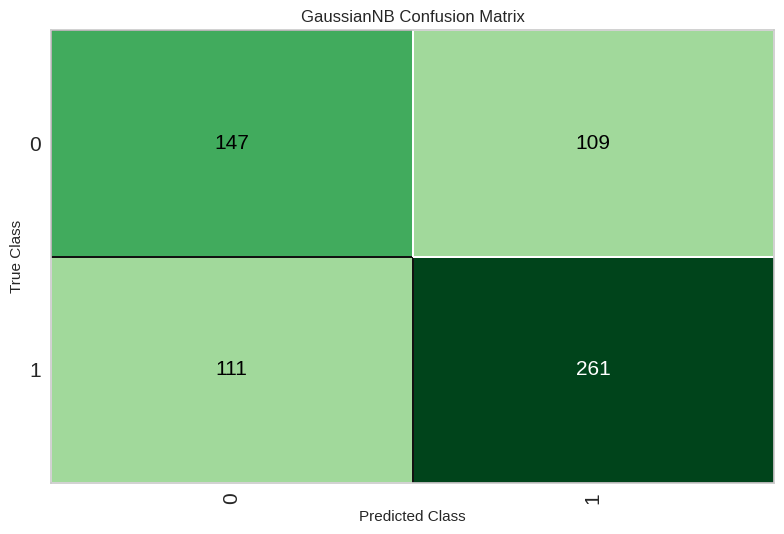

In [63]:
plot_model(tuned_model4, plot = 'confusion_matrix')

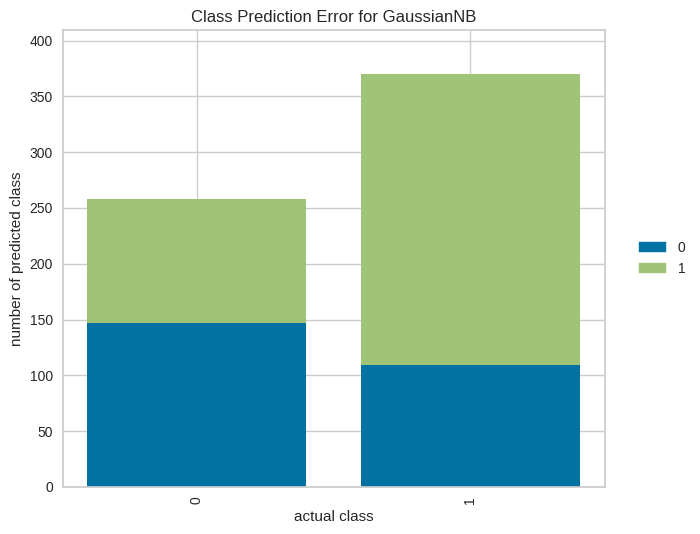

In [64]:
plot_model(tuned_model4, plot = 'error')

# Tentativa de compilação do resultado dos dois modelos:

Escolher os modelos, rodar e comparar os resultados com a coluna de Resultados original.

In [66]:
df_train['Resultado_ve'] = tuned_model3.predict(df_test_ve)
df_train['Resultado_ve'].value_counts()

1    4093
0    1353
Name: Resultado_ve, dtype: int64

In [67]:
df_train['Resultado_vd'] = tuned_model4.predict(df_test_vd) + 1
df_train['Resultado_vd'].value_counts()

2    5271
1     175
Name: Resultado_vd, dtype: int64

In [68]:
df_train['Resultado_modelo'] = df_train['Resultado_ve'] * df_train['Resultado_vd']
df_train['Resultado_modelo'].value_counts()

2    3963
0    1353
1     130
Name: Resultado_modelo, dtype: int64

In [69]:
pd.crosstab(df_train['Resultado'], df_train['Resultado_modelo'])

Resultado_modelo,0,1,2
Resultado,,,
0,502,22,740
1,479,80,1532
2,372,28,1691
